In [ ]:
!pip install networkx matplotlib


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving as-22july06.gml to as-22july06.gml


Saving as-22july06.gml to as-22july06 (7).gml
An error occurred: 'str' object has no attribute 'decode'


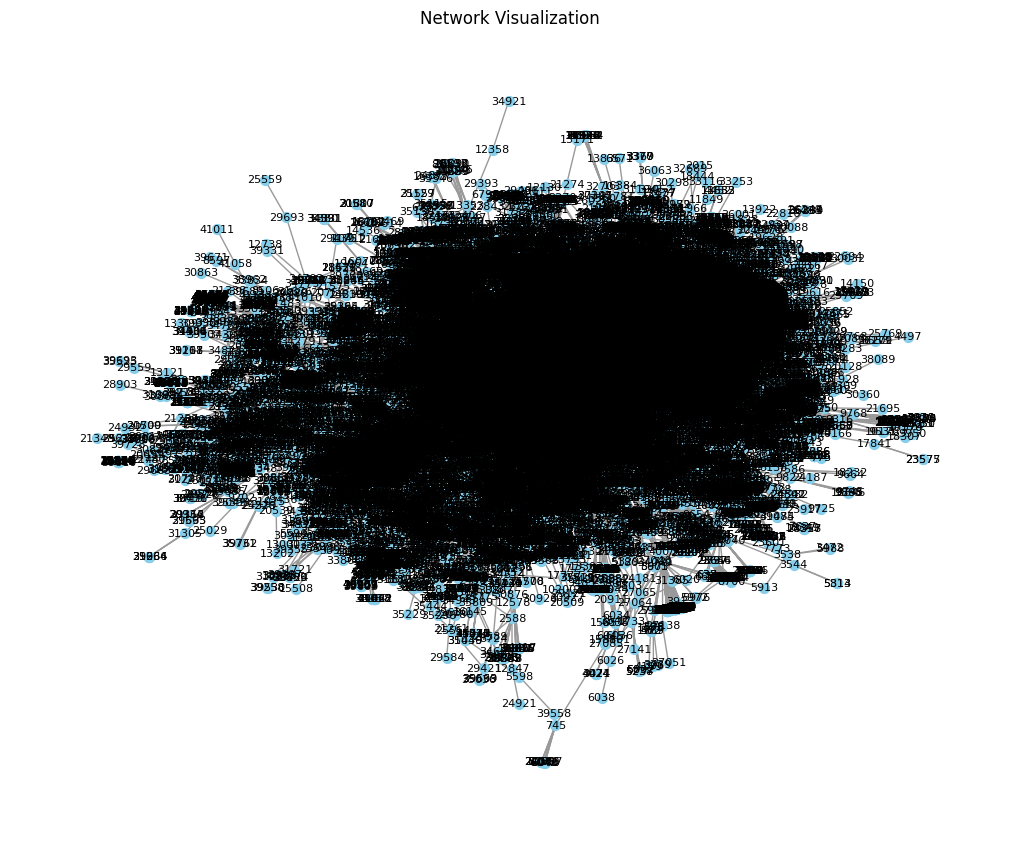

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
import io

uploaded = files.upload()


file_name = next(iter(uploaded))

# Load your .gml file
try:
    g = nx.read_gml(io.StringIO(uploaded[file_name].decode('utf-8')))
    print("Graph loaded successfully with", g.number_of_nodes(), "nodes and", g.number_of_edges(), "edges.")
except Exception as e:
    print("An error occurred:", e)

plt.figure(figsize=(10, 8))
nx.draw(g, with_labels=True, node_color='skyblue', edge_color='#999999', node_size=50, font_size=8)
plt.title('Network Visualization')
plt.show()


Number of nodes: 22963
Number of edges: 48436
Network density: 0.0001837214768149516


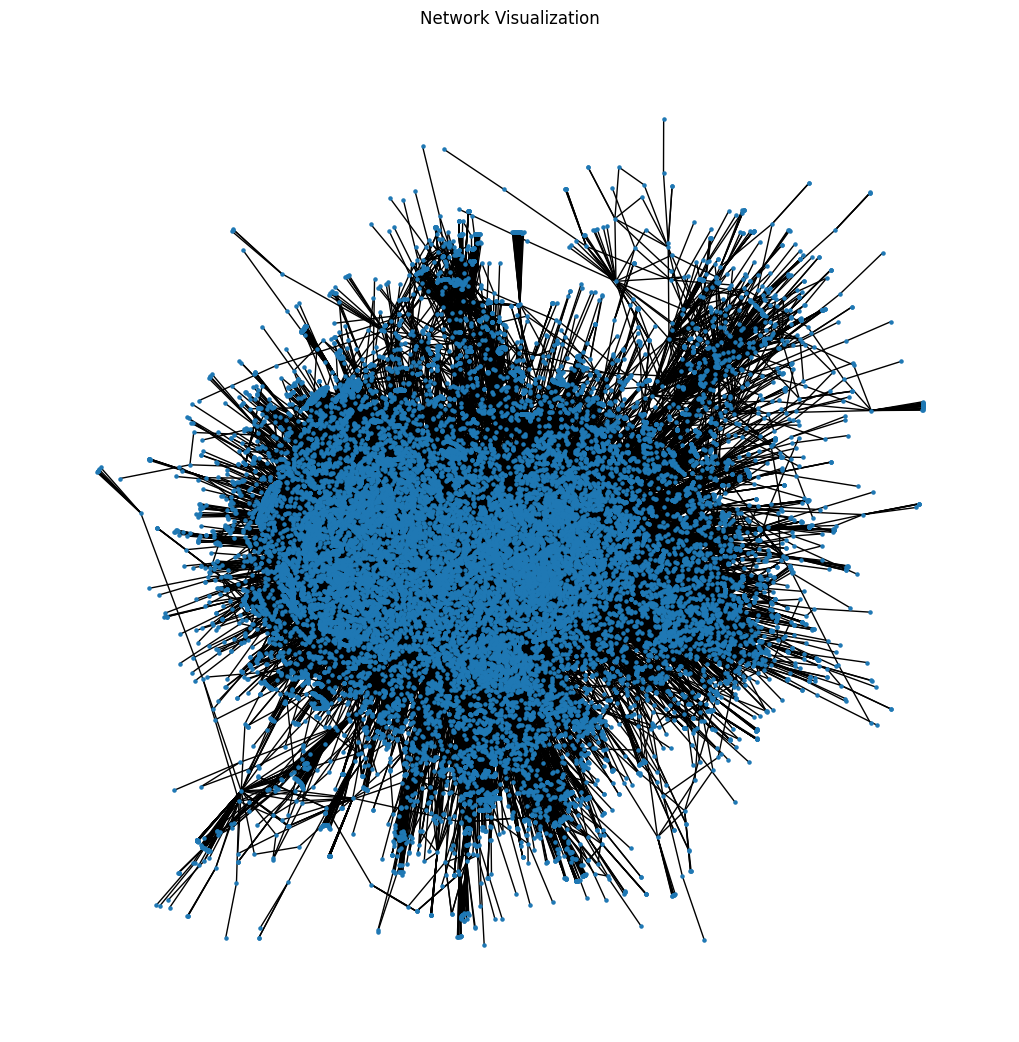

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.read_gml('as-22july06.gml')

# Print basic information about the graph
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())

# Calculate and print network density
density = nx.density(g)
print("Network density:", density)

# Visualizing the network
plt.figure(figsize=(10, 10))
nx.draw(g, node_size=5, with_labels=False)
plt.title("Network Visualization")
plt.show()


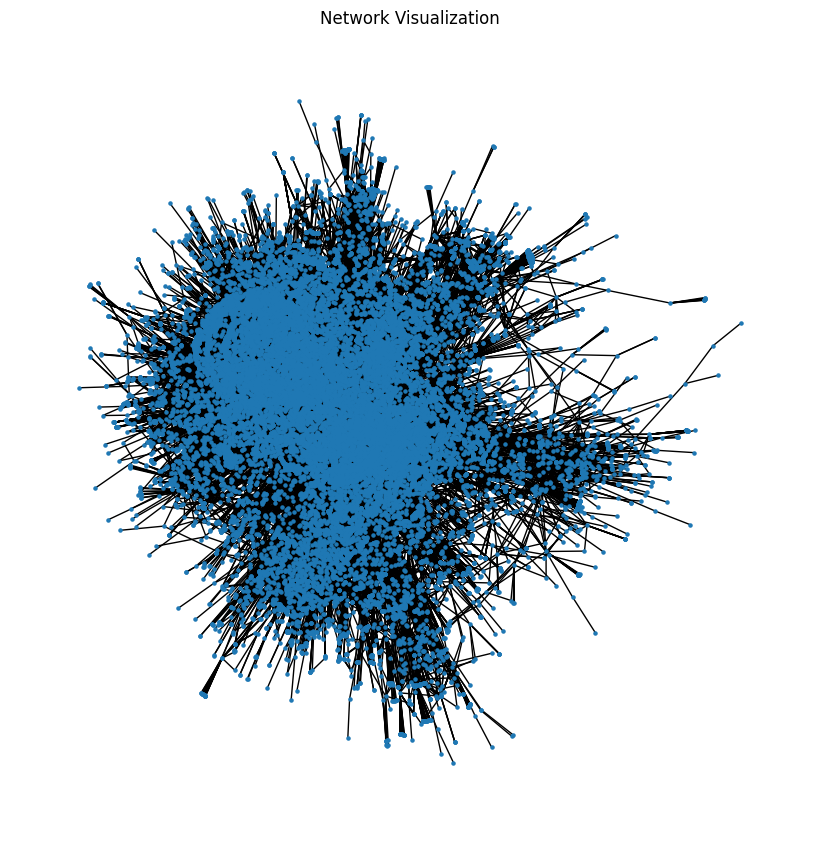

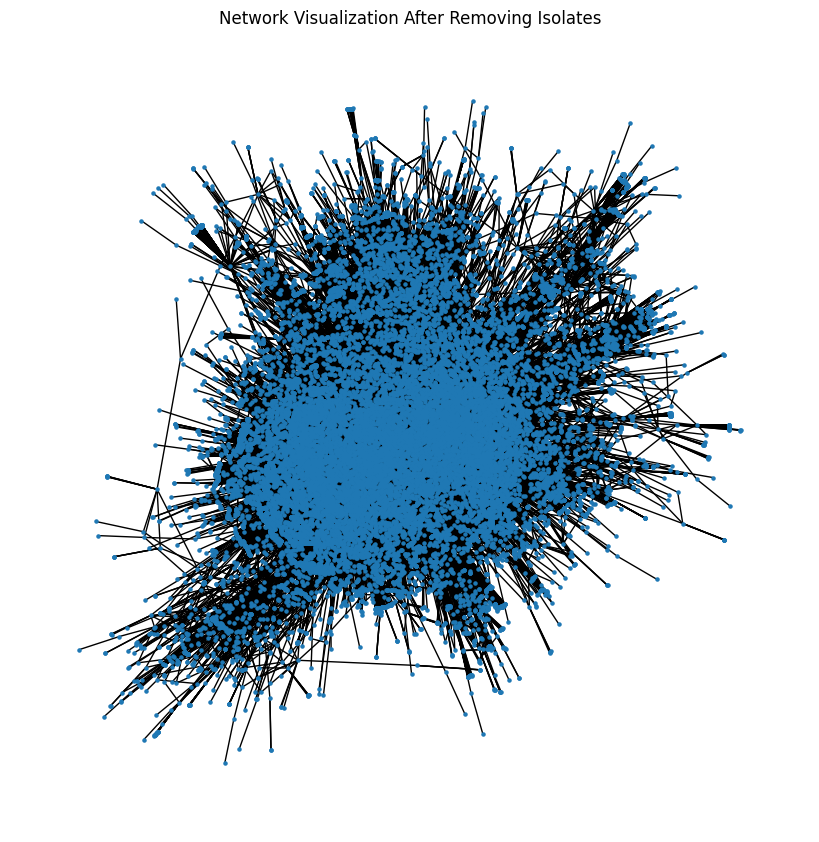

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Read the GML file
g = nx.read_gml(next(iter(uploaded.keys())))

# Plotting the graph
plt.figure(figsize=(8, 8))
nx.draw(g, node_size=5, with_labels=False, font_weight='bold')
plt.title("Network Visualization")
plt.show()

# Check for isolated vertices
isolates = list(nx.isolates(g))
if len(isolates) > 0:
    # Remove isolated vertices
    g.remove_nodes_from(isolates)

# Plot the graph again to show the result after deletion
plt.figure(figsize=(8, 8))
nx.draw(g, node_size=5, with_labels=False, font_weight='bold')
plt.title("Network Visualization After Removing Isolates")
plt.show()


In [ ]:
from google.colab import files
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


uploaded = files.upload()
filename = next(iter(uploaded.keys()))


Saving as-22july06.gml to as-22july06 (5).gml


In [ ]:
# Read the graph
g = nx.read_gml(filename)

# Compute and print network density
density = nx.density(g)
print(f"Network Density: {density:.10f}")

# Calculate degree centrality
degree_centrality = nx.degree_centrality(g)
# Print the degree centrality for each node
print("Degree Centrality Computed:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality:.4f}")



Streaming output truncated to the last 5000 lines.
Node 17222: 0.0001
Node 26599: 0.0000
Node 28591: 0.0001
Node 26104: 0.0000
Node 27656: 0.0000
Node 26607: 0.0001
Node 26592: 0.0001
Node 16397: 0.0003
Node 26602: 0.0000
Node 26090: 0.0000
Node 14204: 0.0000
Node 26622: 0.0002
Node 26609: 0.0001
Node 27652: 0.0000
Node 16735: 0.0004
Node 14868: 0.0001
Node 11921: 0.0000
Node 22381: 0.0000
Node 19182: 0.0001
Node 26107: 0.0000
Node 26598: 0.0000
Node 19361: 0.0001
Node 28590: 0.0001
Node 22818: 0.0001
Node 26218: 0.0001
Node 26616: 0.0000
Node 14463: 0.0001
Node 22356: 0.0002
Node 22706: 0.0000
Node 21571: 0.0000
Node 28587: 0.0000
Node 28589: 0.0000
Node 23128: 0.0001
Node 25933: 0.0001
Node 11706: 0.0001
Node 22689: 0.0001
Node 28586: 0.0001
Node 23002: 0.0001
Node 23105: 0.0000
Node 14840: 0.0001
Node 11432: 0.0002
Node 20266: 0.0000
Node 27688: 0.0000
Node 28584: 0.0001
Node 22148: 0.0000
Node 19090: 0.0001
Node 27664: 0.0001
Node 22819: 0.0001
Node 22341: 0.0001
Node 23289: 0.0000

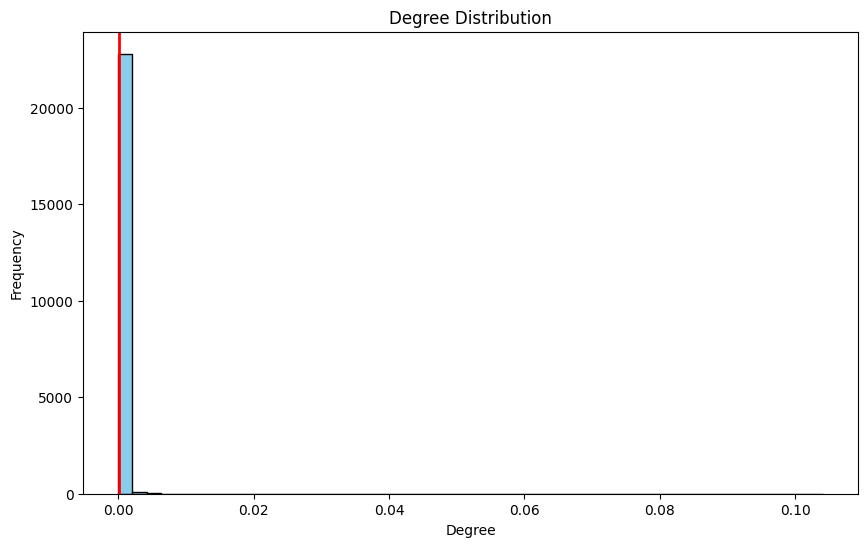

In [ ]:
degrees = list(degree_centrality.values())
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='skyblue', edgecolor='black')
plt.axvline(np.mean(degrees), color='red', linewidth=2)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Detect communities using the Louvain method
partitions = community_louvain.best_partition(g)
num_communities = len(set(partitions.values()))
print("Communities detected:", num_communities)

# Create a color map from the partitions
community_colors = np.array([partitions[node] for node in g.nodes()])
colors = plt.cm.rainbow(np.linspace(0, 1, num_communities))
node_color = colors[community_colors]


Communities detected: 32


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


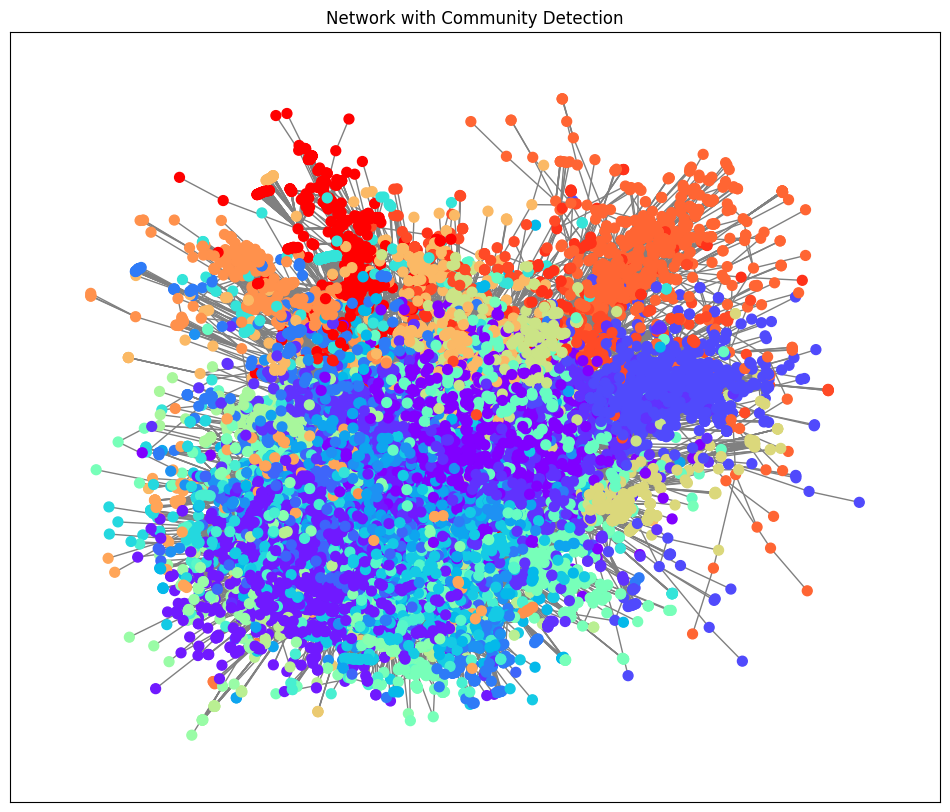

In [ ]:
plt.figure(figsize=(12, 10))
nx.draw_networkx(g, node_color=node_color, node_size=50, with_labels=False, edge_color='gray', cmap=plt.cm.rainbow)
plt.title("Network with Community Detection")
plt.show()


Communities detected: 35


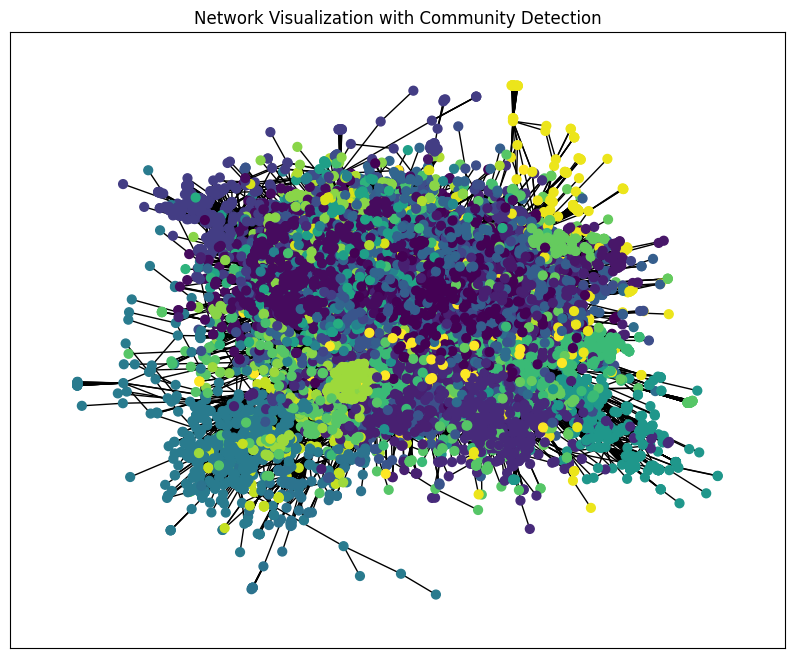

In [ ]:
import community.community_louvain as community_louvain

# Apply community detection
partitions = community_louvain.best_partition(g)
num_communities = len(set(partitions.values()))
print(f"Communities detected: {num_communities}")

# Create a color map from the partitions
color_map = [partitions[node] for node in g.nodes()]

# Drawing the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx(g, node_color=color_map, node_size=40, with_labels=False)
plt.title('Network Visualization with Community Detection')
plt.show()


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded.keys()))


# Load the graph
g = nx.read_gml(filename)


# Function to simulate diffusion
def simulate_diffusion(g, seed_nodes, prob_activation):
    active_nodes = set(seed_nodes)
    nodes_to_explore = list(seed_nodes)

    while nodes_to_explore:
        current_node = nodes_to_explore.pop(0)
        neighbors = set(g.neighbors(current_node)) - active_nodes
        for neighbor in neighbors:
            if np.random.rand() < prob_activation:
                active_nodes.add(neighbor)
                nodes_to_explore.append(neighbor)
    return active_nodes



# Seed based on highest degree centrality
degree_centralities = nx.degree_centrality(g)


# Top 5% central nodes as seeds
top_5_percent = sorted(degree_centralities.items(), key=lambda x: x[1], reverse=True)[:int(0.05 * len(g))]

seed_nodes = [node for node, _ in top_5_percent]


Saving as-22july06.gml to as-22july06 (6).gml


In [ ]:
# Set the random seed for reproducibility
np.random.seed(123)
prob_activation = 0.2

# Simulate diffusion
active_nodes = simulate_diffusion(g, seed_nodes, prob_activation)

# Count the number of active and inactive nodes
num_active_nodes = len(active_nodes)
num_inactive_nodes = len(g) - num_active_nodes

# Define colors for nodes based on activity status
node_colors = ['green' if node in active_nodes else 'red' for node in g.nodes()]


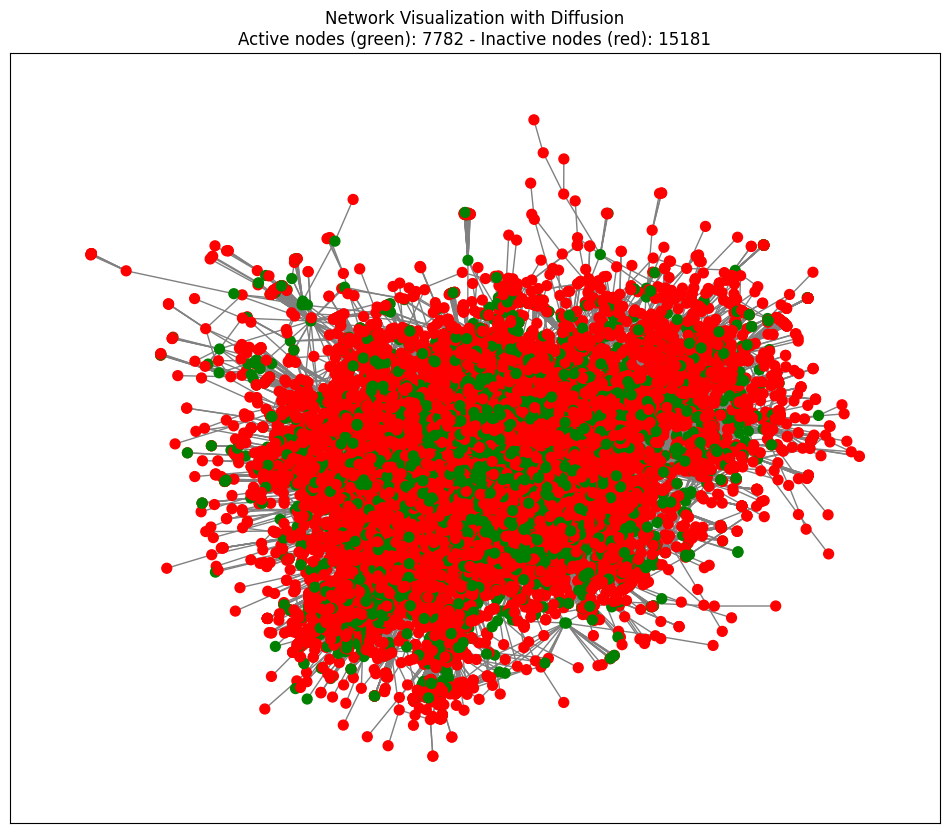

Number of active nodes (green): 7782
Number of inactive nodes (red): 15181


In [ ]:
plt.figure(figsize=(12, 10))
nx.draw_networkx(g, node_color=node_colors, node_size=50, with_labels=False, edge_color='gray')
plt.title(f"Network Visualization with Diffusion\nActive nodes (green): {num_active_nodes} - Inactive nodes (red): {num_inactive_nodes}")
plt.show()

# Print the counts
print("Number of active nodes (green):", num_active_nodes)
print("Number of inactive nodes (red):", num_inactive_nodes)


In [ ]:
print("Number of nodes in the graph:", g.number_of_nodes())
print("Number of edges in the graph:", g.number_of_edges())


Number of nodes in the graph: 34
Number of edges in the graph: 78


In [ ]:
print("Number of connected components:", nx.number_connected_components(g))


Number of connected components: 1


Degree Centrality:
{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}


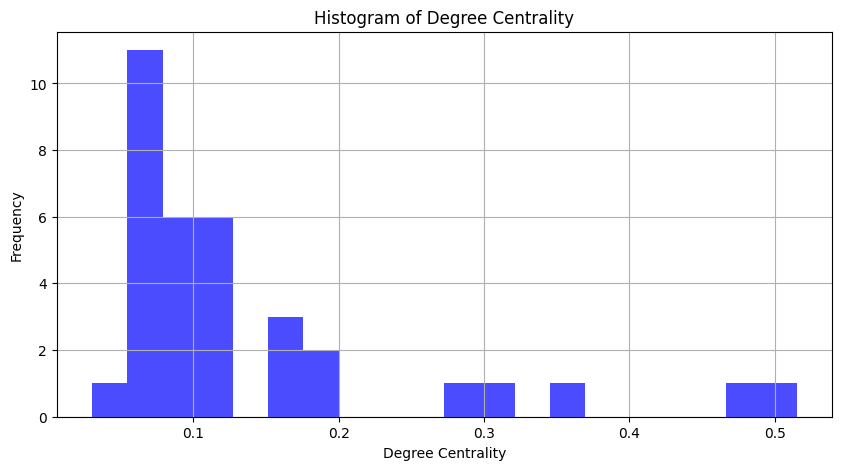

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Calculate degree centrality
degree_centrality = nx.degree_centrality(g)
print("Degree Centrality:")
print(degree_centrality)

# Extract the values of degree centrality into a list for plotting
centrality_values = list(degree_centrality.values())

# Plotting the histogram of degree centrality
plt.figure(figsize=(10, 5))  # Set the size of the figure
plt.hist(centrality_values, bins=20, color='blue', alpha=0.7)  # Create a histogram
plt.title('Histogram of Degree Centrality')  # Set the title of the plot
plt.xlabel('Degree Centrality')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.grid(True)  # Turn on the grid
plt.show()  # Display the plot


In [ ]:
print("Calculating centrality measures...")
betweenness_centrality = nx.betweenness_centrality(g)
print("Betweenness Centrality:")
print(betweenness_centrality)

closeness_centrality = nx.closeness_centrality(g)
print("Closeness Centrality:")
print(closeness_centrality)

eigenvector_centrality = nx.eigenvector_centrality(g, max_iter=1000)
print("Eigenvector Centrality:")
print(eigenvector_centrality)
print("Centrality measures calculated.")


Calculating centrality measures...
Betweenness Centrality:
{0: 0.43763528138528146, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976909, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.30407497594997596}
Closeness Centrality:
{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.366666666666666

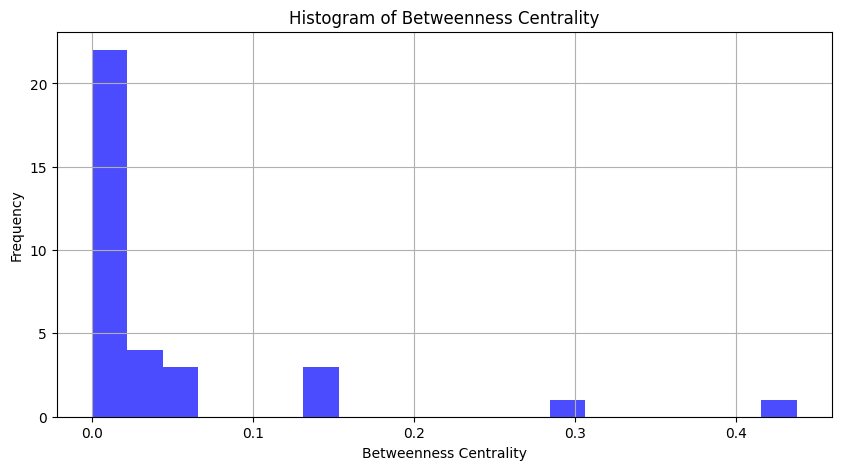

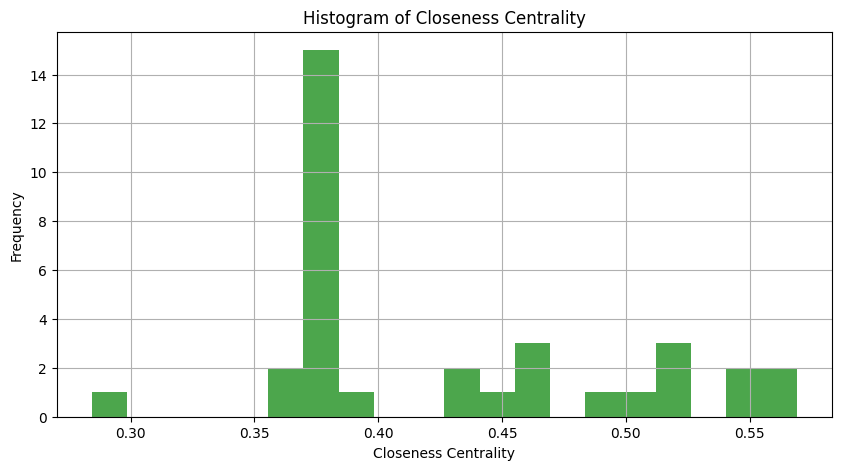

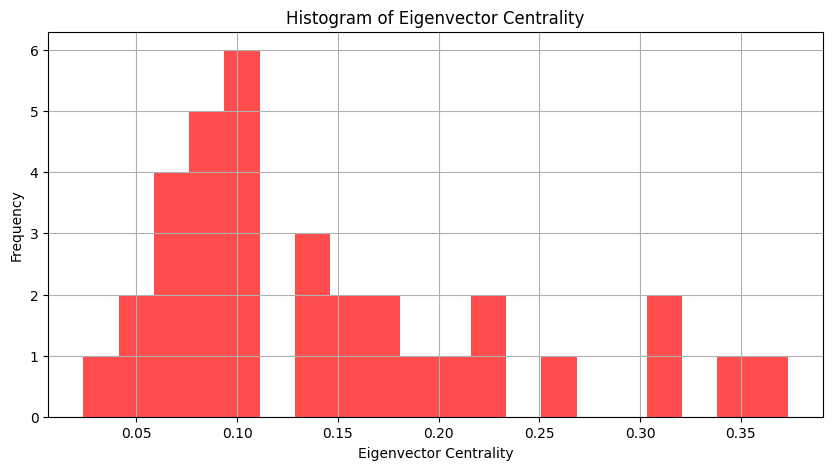

In [ ]:
# Plotting Betweenness Centrality
plt.figure(figsize=(10, 5))
plt.hist(betweenness_centrality.values(), bins=20, color='b', alpha=0.7)
plt.title('Histogram of Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting Closeness Centrality
plt.figure(figsize=(10, 5))
plt.hist(closeness_centrality.values(), bins=20, color='g', alpha=0.7)
plt.title('Histogram of Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting Eigenvector Centrality
plt.figure(figsize=(10, 5))
plt.hist(eigenvector_centrality.values(), bins=20, color='r', alpha=0.7)
plt.title('Histogram of Eigenvector Centrality')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
